In [2]:
# author: Jiahe Zhang
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
baseData = pd.read_csv('./censusSuffolkMA.csv',index_col=0)
baseData

,"Census Tract 1.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1.01, Suffolk County, Massachusetts!!Margin of Error","Census Tract 1.02, Suffolk County, Massachusetts!!Estimate","Census Tract 1.02, Suffolk County, Massachusetts!!Margin of Error","Census Tract 2.01, Suffolk County, Massachusetts!!Estimate","Census Tract 2.01, Suffolk County, Massachusetts!!Margin of Error","Census Tract 2.02, Suffolk County, Massachusetts!!Estimate","Census Tract 2.02, Suffolk County, Massachusetts!!Margin of Error","Census Tract 3.01, Suffolk County, Massachusetts!!Estimate","Census Tract 3.01, Suffolk County, Massachusetts!!Margin of Error",...,"Census Tract 9816, Suffolk County, Massachusetts!!Estimate","Census Tract 9816, Suffolk County, Massachusetts!!Margin of Error","Census Tract 9817, Suffolk County, Massachusetts!!Estimate","Census Tract 9817, Suffolk County, Massachusetts!!Margin of Error","Census Tract 9818, Suffolk County, Massachusetts!!Estimate","Census Tract 9818, Suffolk County, Massachusetts!!Margin of Error","Census Tract 9819, Suffolk County, Massachusetts!!Estimate","Census Tract 9819, Suffolk County, Massachusetts!!Margin of Error","Census Tract 9901.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9901.01, Suffolk County, Massachusetts!!Margin of Error"
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
Total:,191,±61,611,±130,682,±159,723,±141,379,±145,...,0,±13,0,±13,17,±19,0,±13,0,±13
Under .50,0,±13,23,±27,72,±99,87,±63,0,±13,...,0,±13,0,±13,0,±13,0,±13,0,±13
.50 to .74,0,±13,56,±57,0,±13,8,±22,18,±27,...,0,±13,0,±13,0,±13,0,±13,0,±13
.75 to .99,0,±13,4,±15,7,±12,54,±48,0,±13,...,0,±13,0,±13,0,±13,0,±13,0,±13
1.00 to 1.24,6,±11,22,±25,0,±13,122,±97,0,±13,...,0,±13,0,±13,0,±13,0,±13,0,±13
1.25 to 1.49,0,±13,0,±13,39,±41,0,±13,0,±13,...,0,±13,0,±13,0,±13,0,±13,0,±13
1.50 to 1.74,0,±13,27,±43,64,±54,0,±13,25,±17,...,0,±13,0,±13,0,±13,0,±13,0,±13
1.75 to 1.84,0,±13,0,±13,0,±13,0,±13,0,±13,...,0,±13,0,±13,0,±13,0,±13,0,±13
1.85 to 1.99,6,±9,0,±13,62,±95,0,±13,0,±13,...,0,±13,0,±13,0,±13,0,±13,0,±13


In [ ]:
# for col in data:
#     print(col)
#     break
column_names = list(baseData.columns)
print(len(column_names))
column_names

In [5]:
data = baseData.copy()
data["Census Tract 1805, Suffolk County, Massachusetts!!Estimate"]

data["Census Tract 1805, Suffolk County, Massachusetts!!Estimate"].apply(lambda x: x.replace(",", "")).astype(int)

Label (Grouping)
Total:               1018
    Under .50          22
    .50 to .74          7
    .75 to .99         10
    1.00 to 1.24        0
    1.25 to 1.49       36
    1.50 to 1.74       18
    1.75 to 1.84        0
    1.85 to 1.99       30
    2.00 to 2.99      141
    3.00 to 3.99       61
    4.00 to 4.99      148
    5.00 and over     545
Name: Census Tract 1805, Suffolk County, Massachusetts!!Estimate, dtype: int32

In [ ]:
data = baseData.copy()
dataEstimate = pd.DataFrame()
dataEstimateColNames = []
# remove camma from datasets
for name in column_names:
    # if data[name].dtypes is "int64":
    try:
        data[name] = data[name].apply(lambda x: str(x).replace(",", "")).astype(int)
        dataEstimate[name] = data[name]
        dataEstimateColNames.append(name)
    except:
        # print(name)
        data[name] = data[name].apply(lambda x: str(x).replace(",", "").replace("±", "")).astype(int)
        # data[name] = data[name].apply(lambda x: x[1:]).astype(int)
dataEstimate.shape

In [7]:
totalPopulation = 0
graphColNames = []
family_num_per_area = []
population_under_050 = []
population_050_074 = []
population_075_099 = []
for name in dataEstimateColNames:
    totalPopulation += dataEstimate[name][0]
    graphColName = name.split(",")[0].split(" ")[2]
    graphColNames.append(graphColName)
    family_num_per_area.append(dataEstimate[name][0])
    population_under_050.append(dataEstimate[name][1])
    population_050_074.append(dataEstimate[name][2])
    population_075_099.append(dataEstimate[name][3])



Text(0.5, 1.0, 'family count vs. district')

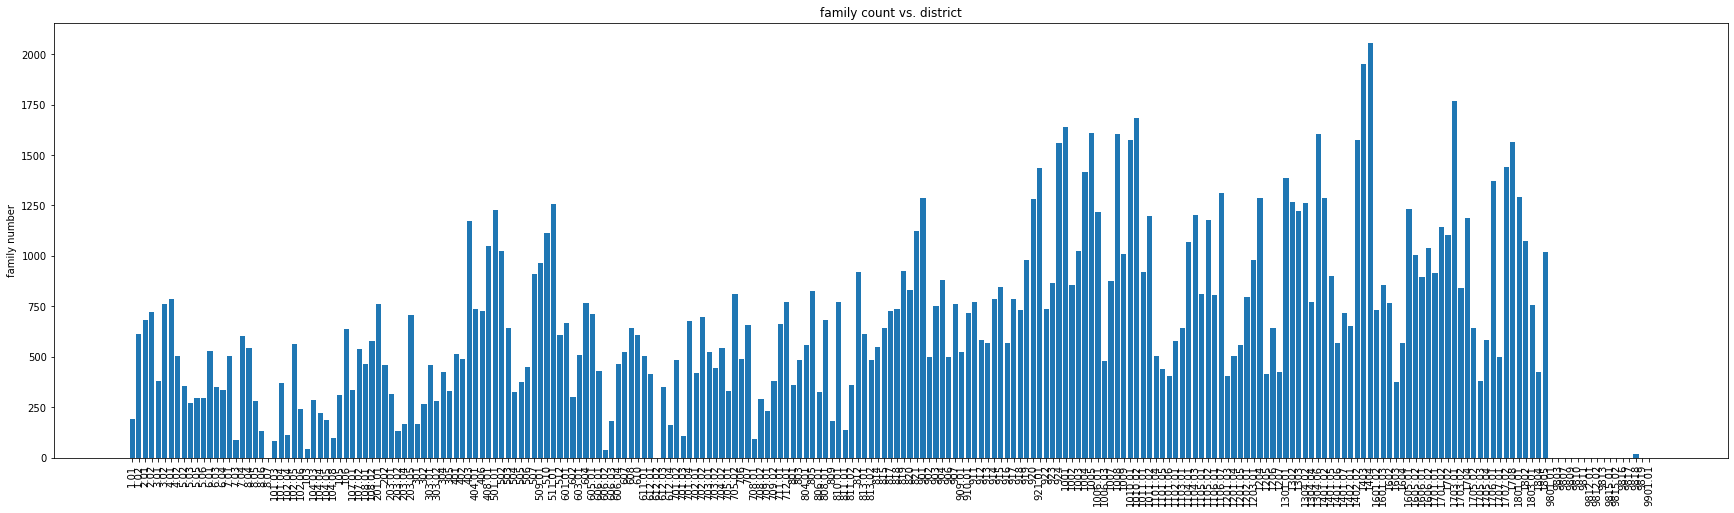

In [8]:
plt.figure(figsize=(30,8))
plt.bar(graphColNames,family_num_per_area )
plt.xticks(rotation = 90)
plt.ylabel("family number")
plt.title("family count vs. district")

/var/folders/7m/vl0wbnm94xg_qdd6km9hdqrw0000gn/T/ipykernel_21485/3548606766.py:3: RuntimeWarning: invalid value encountered in long_scalars
  y = [(population_under_050[i] + population_050_074[i] + population_075_099[i] )/family_num_per_area[i] for i in range(len(family_num_per_area)) ]


Text(0.5, 1.0, 'poverty Percentage vs. district')

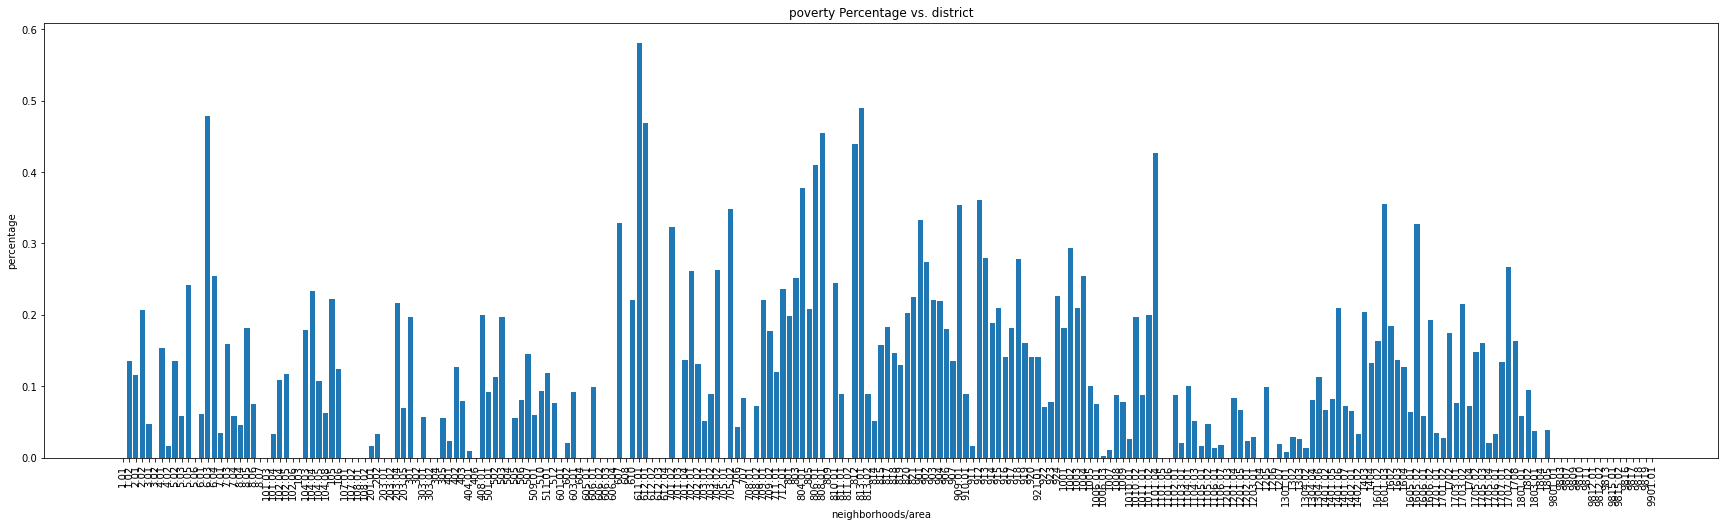

In [70]:
# Which neighborhoods and districts have the highest concentration (aka. Highest percentage) of people living under the poverty line?

y = [(population_under_050[i] + population_050_074[i] + population_075_099[i] )/family_num_per_area[i] for i in range(len(family_num_per_area)) ]

plt.figure(figsize=(30,8))
plt.bar(graphColNames, y )
plt.xticks(rotation = 90)
plt.ylabel("percentage")
plt.xlabel("neighborhoods/area")
plt.title("poverty Percentage vs. district")

C:\Users\Herbert\AppData\Local\Temp\ipykernel_70436\3227229537.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


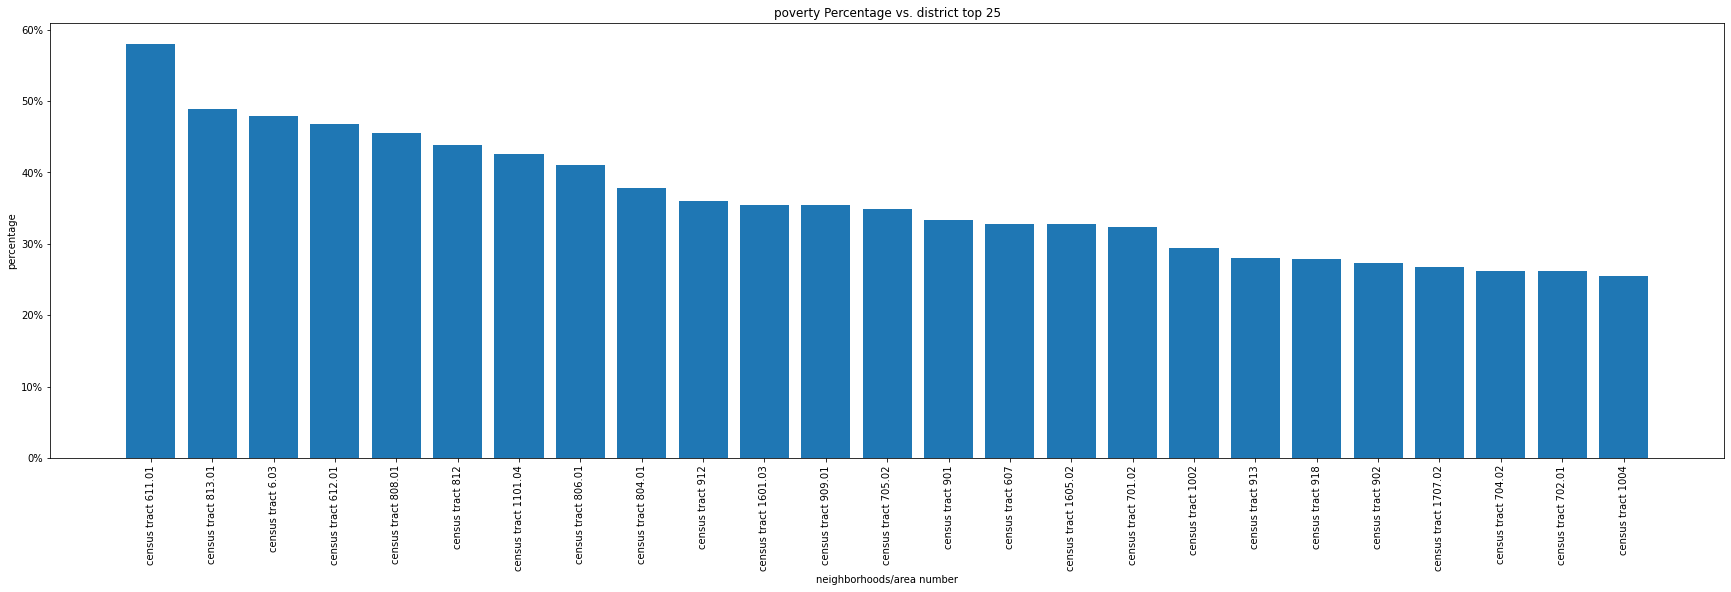

In [9]:
# Top 25 poverty Percentage :
from matplotlib.ticker import FuncFormatter

y = [((population_under_050[i] + population_050_074[i] + population_075_099[i])/family_num_per_area[i], graphColNames[i] ) for i in range(len(family_num_per_area)) if family_num_per_area[i] != 0]

y = sorted(y, reverse=True)

plt.figure(figsize=(30,8))
plt.bar(["census tract "+ str(i[1]) for i in y[:25]], [i[0] for i in y[:25]] )
plt.xticks(rotation = 90)
plt.ylabel("percentage")
plt.xlabel("neighborhoods/area number")
plt.title("poverty Percentage vs. district top 25")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 

mostPoorArea_percentage = [str(i[1]) for i in y[:25]]

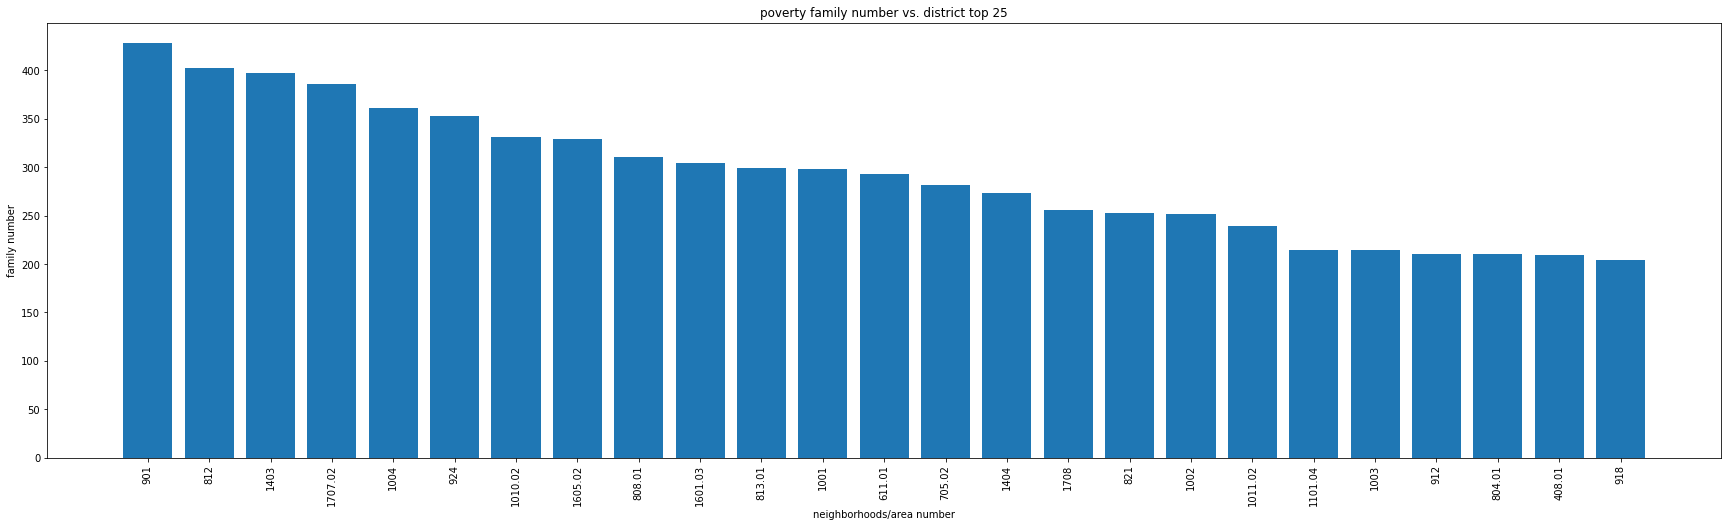

In [86]:
# Top 25 poverty family district:
y = [((population_under_050[i] + population_050_074[i] + population_075_099[i]), graphColNames[i] ) for i in range(len(family_num_per_area)) if family_num_per_area[i] != 0]

y = sorted(y, reverse=True)
plt.figure(figsize=(30,8))
plt.bar(["census tract "+str(i[1]) for i in y[:25]], [i[0] for i in y[:25]] )
plt.xticks(rotation = 90)
plt.ylabel("family number")
plt.xlabel("neighborhoods/area number")
plt.title("poverty family number vs. district top 25")

mostPoorArea = [str(i[1]) for i in y[:25]]

In [87]:
for name in mostPoorArea:
    if name in mostPoorArea_percentage:
        print(name)
# https://mtgis-portal.geo.census.gov/arcgis/apps/webappviewer/index.html?id=1465e551f10648f292b50ef17c74adaf for marker

901
812
1707.02
1004
1605.02
808.01
1601.03
813.01
611.01
705.02
1002
1101.04
912
804.01
918


### These districts have the largest poverty ratio and the largest poverty population, therefore, need the most help:
901
812
1707.02
1004
1605.02
808.01
1601.03
813.01
611.01
705.02
1002
1101.04
912
804.01
918

Text(0.5, 1.0, 'family number vs. poverty level')

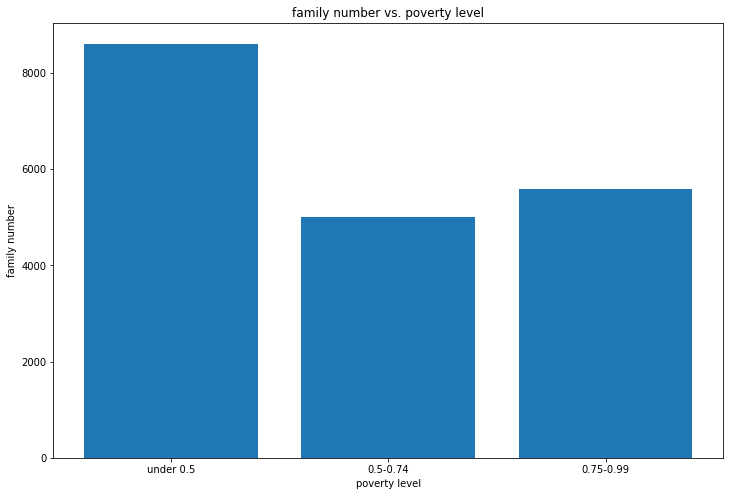

In [60]:
# Which income range under the poverty level contains the most people / families
poverty_level = ["under 0.5", "0.5-0.74", "0.75-0.99"]
family_num_per_poverty_level = [np.sum(population_under_050), np.sum(population_050_074), np.sum(population_075_099)]

plt.figure(figsize=(12,8))
plt.bar(poverty_level, family_num_per_poverty_level )
plt.ylabel("family number")
plt.xlabel("poverty level")
plt.title("family number vs. poverty level")